<h1><center>Laboratorio 3: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Daniel Carmona G.
- Nombre de alumno 2: Consuelo Rojas N.


### **Link de repositorio de GitHub:** `https://github.com/DanielCG19/Evaluaciones-MDS7202`

### Reglas:

- **Grupos de máximo 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [77]:
%pip install -U scikit-learn
%pip install -U matplotlib
%pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [78]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

#Libreria para plotear
%pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# !pip install seaborn
import seaborn as sns
sns.set_theme(style='darkgrid')

Note: you may need to restart the kernel to use updated packages.


# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [79]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [80]:
header = ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch',
    'test preparation course', 'math score','reading score', 'writing score']

#lectura del archivo    
df_grades = pd.read_json('students_grades.json',orient='records')

#añadimos el header
df_grades.columns = header
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [X] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [X] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [X] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [X] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [X] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [X] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [X] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [X] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [81]:
def exploratory_data_analysis(dataframe):
    df = dataframe
    n = 1 

    #dimensiones dataframe
    print(df.shape)

    #columnas dataframe
    print(df.columns)

    #sample
    display(df.head(),df.tail(),df.sample(5, random_state=n))

    #descripción
    display(df.describe().round(2))
    
    #nulos totales
    print(df.isna().sum())

    #valores únicos
    print(df.nunique())

    #duplicados
    print(df.duplicated(subset='names', keep=False))

    #plot box
    df[['math score','reading score', 'writing score']].replace('', 0).astype(int).plot.box(figsize=(10, 8))
    # df.plot.box(column=['math score','reading score', 'writing score'],figsize=(10, 8))


**Justificación:**

```
De los boxplot, es posible notar que la gran mayoría de los datos se encuentra cercano al cuarto cuartil, lo que indica que la mayoría de los alumnos obtuvieron buenas notas, manteniendo la gran mayoría entre los valores de 0 a 150 pts, aún con la existencia de valores excepcionalmente mayores. Estos valores se consideran outliers.

Para el caso de los valores duplicados, estos no son posible de detectar en los boxplot, a menos que se les asignará un tipo de color especifico para cada alumno. Notar que la existencia de valores nan no se pueden notar, dado que el sistema los obvia, mas la existencia de valores cero si se muestran en los boxplot y estos corresponden a outliers, igualmente.

**@Dani, chamullar más si puedes
```

**Respuesta Esperada:**

(1400, 9)
Index(['names', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193,142,193
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66,74,81
1397,Laurie Carter,female,group B,some high school,standard,completed,54,61,62
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193,196,193
1399,Amanda Perez,female,group A,high school,standard,completed,68,80,76


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
547,Oliver Seldon,male,group B,high school,standard,completed,76,62,60
754,Robert Sturgeon,male,group E,some college,standard,none,83,80,73
1283,Nicole Obrien,female,group B,bachelor's degree,free/reduced,none,193,124,124
1128,Leona Markow,female,group A,some college,standard,none,142,193,64
1063,Lisa Watters,female,group D,master's degree,free/reduced,none,40,196,124


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1400,1400,1400,1400,1400,1400,1400,1400,1400
unique,1153,2,5,6,2,2,97,89,93
top,Robert Frazier,female,group C,some college,standard,none,193,193,193
freq,3,723,452,334,904,898,120,117,133


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       97
reading score                    89
writing score                    93
dtype: int64
0        True
1       False
2       False
3       False
4       False
        ...  
1395     True
1396    False
1397    False
1398     True
1399    False
Length: 1400, dtype: bool


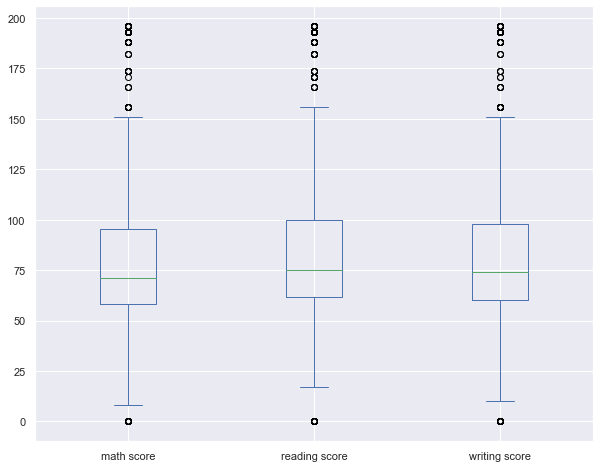

In [82]:
exploratory_data_analysis(df_grades)

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Una vez limpiado cada uno de los `DataFrames` compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [X] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

In [83]:
def clean_data(df):
    output = df.copy()
    output = output.drop_duplicates(subset=['names'], keep=False)
    output = output.dropna()

    output[['math score','reading score', 'writing score']] = output[['math score','reading score', 'writing score']].replace('', 0).astype(int)
    output = output.drop(output[(output['math score'] > 100) & (output['math score'] > 100) & (output['writing score'] > 100)].index).reset_index(drop=True) 

    return output

(796, 9)
Index(['names', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
1,Wayne Wilson,male,group B,some high school,standard,completed,94,86,87
2,William Tang,male,group D,associate's degree,standard,none,75,68,64
3,Mikki Amaya,female,group A,high school,free/reduced,completed,34,48,41
4,Gerald Wilson,male,group A,associate's degree,standard,none,63,61,61


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
791,Richard Young,male,group D,high school,standard,none,69,75,71
792,Wanda Russell,female,group B,high school,free/reduced,completed,23,44,36
793,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66,74,81
794,Laurie Carter,female,group B,some high school,standard,completed,54,61,62
795,Amanda Perez,female,group A,high school,standard,completed,68,80,76


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
8,Donald Upchurch,male,group C,associate's degree,standard,none,62,65,58
552,Kenneth Armendariz,male,group B,associate's degree,free/reduced,completed,58,57,53
175,Robert Taylor,male,group E,high school,free/reduced,completed,86,81,75
349,Dana Mojica,female,group D,high school,free/reduced,none,39,52,46
519,Fannie Hindman,female,group D,high school,standard,none,67,72,74


,math score,reading score,writing score
count,796.00,796.00,796.00
mean,67.17,73.22,68.83
std,23.95,26.21,23.77
min,0.00,0.00,0.00
25%,57.00,60.00,57.00
50%,66.00,71.00,69.00
75%,77.00,81.25,80.00
max,196.00,196.00,196.00


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
names                          796
gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      83
reading score                   80
writing score                   84
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
791    False
792    False
793    False
794    False
795    False
Length: 796, dtype: bool


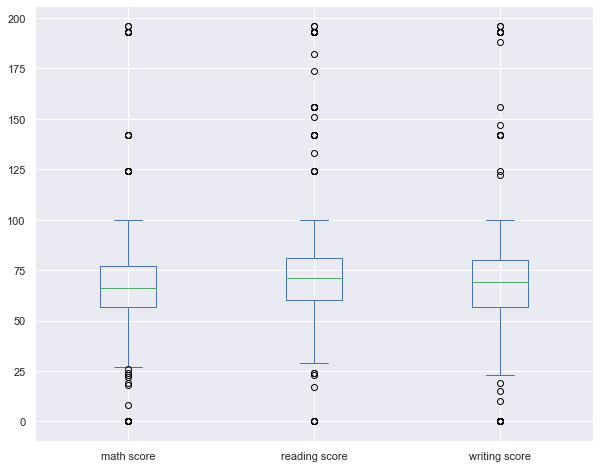

In [84]:
df_grades2 = clean_data(df_grades)
df_grades2.head()
exploratory_data_analysis(df_grades2)

> Utilice la función creada en el punto 1.1 para verificar sus resultados.

**Justificación:**

```
Escriba aquí su justificación
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas que se escapan del rango [1,7] y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [85]:
def nota_chilena(dataframe_in, columna):
  
  pass

### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del DataFrame original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el DataFrame original.


**Respuesta:**

In [86]:
def alumnos_promedio(dataframe_in):
  pass

**Respuesta Esperada:**

In [87]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

AttributeError: 'NoneType' object has no attribute 'head'

### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [ ]:
def reprobados_destacados(dataframe_in):
    pass


In [ ]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
2,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
3,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
4,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
81,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
82,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
83,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
84,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [ ]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [ ]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.0
1,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.0
2,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.0
3,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
4,Emma Brasher,female,group D,some high school,standard,completed,6.82,7.00,7.00,6.94
...,...,...,...,...,...,...,...,...,...,...
89,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
90,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
91,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
92,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


**Respuesta:**

```
Escriba aqui su respuesta
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [ ]:
def consulta_gpa(dataframe_in, lista_alumnos):
    pass


lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,GPA
198,Lucille Stanphill,5.94
372,Marcus Mcfarland,4.86
418,Matthew Freeman,R
421,Dana Mojica,R
675,Robert Strain,4.4
679,Ronald Jett,R
681,Hazel Posey,R
753,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [ ]:
# Código para quintiles 
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.

# Código de gráfico 
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


```
Escriba aqui su respuesta
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>